In [110]:
# import all libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [111]:
# read dataset from csv file

df_raw = pd.read_csv("heart_2020_cleaned.csv")


In [112]:
# details of the dataset

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [113]:
# first 5 rows of the dataset

df_raw.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [114]:
def clean_data_one_hot(df_raw):
    df = df_raw.copy()
    
    for col in df.columns:
        yes_no = True
        for i in df[col]:
            if i == 'No' or i == 'Yes':
                pass
            else :
                yes_no = False
        if yes_no == True:
            df[col] = df[col].map({'Yes' : 1, 'No' : 0})

    df['GenHealth'] = df['GenHealth'].map({'Excellent' : 5, 'Very good' : 4, 'Fair' : 3, 'Good' : 2, 'Poor' : 1 })

    one_hot_sex = pd.get_dummies(df['Sex'])
    df = df.drop('Sex',axis = 1)
    df = df.join(one_hot_sex)

    age_list = []
    for i in df.AgeCategory:
        if i not in age_list:
            age_list.append(i)
    age_dict = {}
    for i in age_list:
        age_cat = i[:2]
        age_dict[i] = age_cat
    df['AgeCategory'] = df['AgeCategory'].map(age_dict)

    one_hot_race = pd.get_dummies(df['Race'])
    one_hot_race.rename(columns = {'American Indian/Alaskan Native' : 'NativeAmerican'}, inplace = True)
    df = df.drop('Race',axis = 1)
    df = df.join(one_hot_race)

    one_hot_Diabetic = pd.get_dummies(df['Diabetic'])
    df = df.drop('Diabetic',axis = 1)
    df = df.join(one_hot_Diabetic)

    col_list = df.columns
    x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(data = x_scaled, columns = col_list)

    return df

In [115]:
def clean_data_label(df_raw):
    df = df_raw.copy()
    
    for col in df.columns:
        yes_no = True
        for i in df[col]:
            if i == 'No' or i == 'Yes':
                pass
            else :
                yes_no = False
        if yes_no == True:
            print(col)
            df[col] = df[col].map({'Yes' : 1, 'No' : 0})

    df['GenHealth'] = df['GenHealth'].map({'Excellent' : 5, 'Very good' : 4, 'Fair' : 3, 'Good' : 2, 'Poor' : 1 })

    # one_hot_sex = pd.get_dummies(df['Sex'])
    # df = df.drop('Sex',axis = 1)
    # df = df.join(one_hot_sex)
    df['Sex'] = df['Sex'].map({'Male' : 1, 'Female' : 0})

    age_list = []
    for i in df.AgeCategory:
        if i not in age_list:
            age_list.append(i)
    age_dict = {}
    for i in age_list:
        age_cat = i[:2]
        age_dict[i] = age_cat
    df['AgeCategory'] = df['AgeCategory'].map(age_dict)

    # one_hot_race = pd.get_dummies(df['Race'])
    # one_hot_race.rename(columns = {'American Indian/Alaskan Native' : 'NativeAmerican'}, inplace = True)
    # df = df.drop('Race',axis = 1)
    # df = df.join(one_hot_race)
    race_list = ['American Indian/Alaskan Native','Asian','Black','White','Other','Hispanic']

    race_dict = {}
    for i in range(len(race_list)):
        race_dict[race_list[i]] = i
    # race_dict_percent = {}
    # for i in race_list:
    #     race_dict[i] = 0
    #     race_dict_percent[i] = 0
    # for i in df.index:
    #     race_dict_percent[df.Race[i]] += 1
    #     if df['HeartDisease'][i] == 1:
    #         race_dict[df.Race[i]] += 1
    # for i in race_list:
    #     race_dict[i] /= race_dict_percent[i] 
    
    df['Race'] = df['Race'].map(race_dict)


    # one_hot_Diabetic = pd.get_dummies(df['Diabetic'])
    # df = df.drop('Diabetic',axis = 1)
    # df = df.join(one_hot_Diabetic)
    #diabetes_dict = {'Yes' : 3, 'Yes (during pregnancy)' : 2, 'No, borderline diabetes' : 1, 'No' : 0}
    diabetes_list = ['Yes', 'Yes (during pregnancy)', 'No, borderline diabetes', 'No']

    diabetes_dict = {}
    for i in range(len(diabetes_list)):
        diabetes_dict[diabetes_list[i]] = i

    # diabetes_dict_percent = {}
    # for i in diabetes_list:
    #     diabetes_dict[i] = 0
    #     diabetes_dict_percent[i] = 0
    # for i in df.index:
    #     diabetes_dict_percent[df.Diabetic[i]] += 1
    #     if df['HeartDisease'][i] == 1:
    #         diabetes_dict[df.Diabetic[i]] += 1
    # for i in diabetes_list:
    #     diabetes_dict[i] /= diabetes_dict_percent[i] 
    


    df['Diabetic'] = df['Diabetic'].map(diabetes_dict)
    col_list = df.columns
    print(df)
    x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(data = x_scaled, columns = col_list)

    return df

In [116]:
def clean_data_label(df):
    obj_list = df.select_dtypes(include='object').columns
    le = LabelEncoder()
    for obj in obj_list:
        df[obj] = le.fit_transform(df[obj].astype(str))
    col_list = df.columns
    x = df.values #returns a numpy array
    # min_max_scaler = preprocessing.MinMaxScaler()
    # x_scaled = min_max_scaler.fit_transform(x)
    x_scaled = x
    df = pd.DataFrame(data = x_scaled, columns = col_list)

    return df

In [117]:
df_raw.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [118]:
df = clean_data_label(df_raw)
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,16.60,1.0,0.0,0.0,3.0,30.0,0.0,0.0,7.0,5.0,2.0,1.0,4.0,5.0,1.0,0.0,1.0
1,0.0,20.34,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,5.0,0.0,1.0,4.0,7.0,0.0,0.0,0.0
2,0.0,26.58,1.0,0.0,0.0,20.0,30.0,0.0,1.0,9.0,5.0,2.0,1.0,1.0,8.0,1.0,0.0,0.0
3,0.0,24.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,0.0,0.0,2.0,6.0,0.0,0.0,1.0
4,0.0,23.71,0.0,0.0,0.0,28.0,0.0,1.0,0.0,4.0,5.0,0.0,1.0,4.0,8.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1.0,27.41,1.0,0.0,0.0,7.0,0.0,1.0,1.0,8.0,3.0,2.0,0.0,1.0,6.0,1.0,0.0,0.0
319791,0.0,29.84,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,0.0,1.0,4.0,5.0,1.0,0.0,0.0
319792,0.0,24.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,1.0,2.0,6.0,0.0,0.0,0.0
319793,0.0,32.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,2.0,12.0,0.0,0.0,0.0


In [119]:
df_raw.iloc[8945]

HeartDisease         0.00
BMI                 31.95
Smoking              0.00
AlcoholDrinking      0.00
Stroke               0.00
PhysicalHealth       1.00
MentalHealth         0.00
DiffWalking          0.00
Sex                  0.00
AgeCategory         10.00
Race                 0.00
Diabetic             0.00
PhysicalActivity     1.00
GenHealth            4.00
SleepTime            7.00
Asthma               1.00
KidneyDisease        0.00
SkinCancer           0.00
Name: 8945, dtype: float64

In [120]:
df.duplicated().sum()

18078

In [121]:
print(df.shape)
df.drop_duplicates(inplace = True)
print(df.shape)

(319795, 18)
(301717, 18)


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  float64
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  float64
 3   AlcoholDrinking   301717 non-null  float64
 4   Stroke            301717 non-null  float64
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  float64
 8   Sex               301717 non-null  float64
 9   AgeCategory       301717 non-null  float64
 10  Race              301717 non-null  float64
 11  Diabetic          301717 non-null  float64
 12  PhysicalActivity  301717 non-null  float64
 13  GenHealth         301717 non-null  float64
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  float64
 16  KidneyDisease     30

In [123]:
df.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000
mean,0.090353,28.441970,0.422267,0.071527,0.039984,3.572298,4.121475,0.147009,0.470792,6.509408,4.365409,0.316926,0.763669,2.221217,7.084559,0.141361,0.039030,0.097084
std,0.286687,6.468134,0.493921,0.257704,0.195923,8.140656,8.128288,0.354115,0.499147,3.584510,1.235817,0.732372,0.424828,1.511502,1.467122,0.348394,0.193667,0.296073
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000,0.000000,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,5.000000,0.000000,1.000000,2.000000,7.000000,0.000000,0.000000,0.000000
75%,0.000000,31.650000,1.000000,0.000000,0.000000,2.000000,4.000000,0.000000,1.000000,9.000000,5.000000,0.000000,1.000000,4.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,1.000000,12.000000,5.000000,3.000000,1.000000,4.000000,24.000000,1.000000,1.000000,1.000000


[274456, 27261]


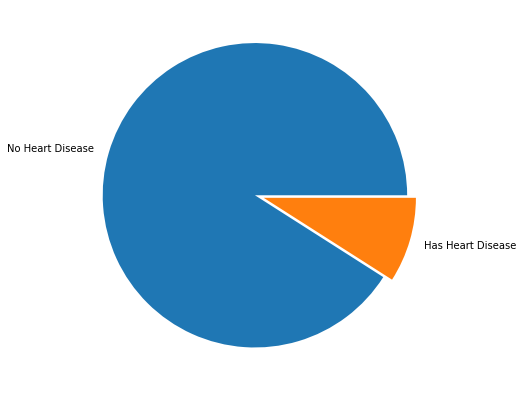

In [124]:
 
data = list(df['HeartDisease'].value_counts())
print(data)
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = ['No Heart Disease', 'Has Heart Disease'], explode=[0.03 for i in df['HeartDisease'].value_counts().index])
 
# show plot
plt.show()

In [125]:
df.HeartDisease.value_counts(normalize = True)

0.0    0.909647
1.0    0.090353
Name: HeartDisease, dtype: float64

In [126]:
def under_sample(df, x = 1):
    disease = df[df['HeartDisease'] == 1]
    no_disease = df[df['HeartDisease'] == 0]
    no_disease = no_disease.sample(n = x * len(disease), random_state=101)
    df = pd.concat([disease,no_disease],axis=0)
    return df

In [127]:
df_ = under_sample(df)

[27261, 27261]


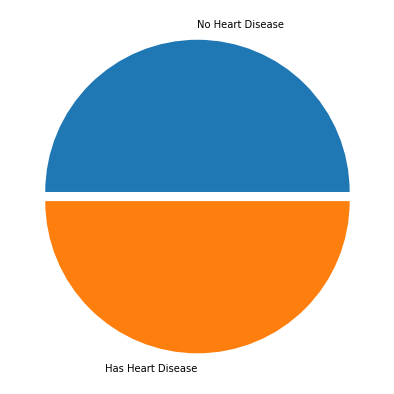

In [128]:
 
data = list(df_['HeartDisease'].value_counts())
print(data)
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = ['No Heart Disease', 'Has Heart Disease'], explode=[0.03 for i in df['HeartDisease'].value_counts().index])
 
# show plot
plt.show()

In [129]:
df_.HeartDisease.value_counts(normalize = True)

1.0    0.5
0.0    0.5
Name: HeartDisease, dtype: float64

In [130]:
df_.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,1.0,28.87,1.0,0.0,0.0,6.0,0.0,1.0,0.0,11.0,2.0,0.0,0.0,1.0,12.0,0.0,0.0,0.0
10,1.0,34.30,1.0,0.0,0.0,30.0,0.0,1.0,1.0,8.0,5.0,2.0,0.0,3.0,15.0,1.0,0.0,0.0
35,1.0,32.98,1.0,0.0,1.0,10.0,0.0,1.0,1.0,11.0,5.0,2.0,1.0,3.0,4.0,0.0,0.0,1.0
42,1.0,25.06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.0,5.0,2.0,0.0,2.0,7.0,0.0,0.0,1.0
43,1.0,30.23,1.0,0.0,0.0,6.0,2.0,1.0,0.0,11.0,5.0,2.0,1.0,1.0,8.0,0.0,1.0,0.0


In [131]:
X_under = np.array(df_.drop('HeartDisease', axis = 1))
X = np.array(df.drop('HeartDisease', axis = 1))
X_under

array([[28.87,  1.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [34.3 ,  1.  ,  0.  , ...,  1.  ,  0.  ,  0.  ],
       [32.98,  1.  ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       ...,
       [25.09,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [29.26,  1.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [29.84,  1.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [132]:
X.shape

(301717, 17)

In [133]:
Y_under = np.array(df_.HeartDisease)
Y = np.array(df.HeartDisease)
Y_under

array([1., 1., 1., ..., 0., 0., 0.])

In [134]:
x_train, d, y_train, d = train_test_split(X_under, Y_under, test_size = 0.1)
d, x_test, d, y_test = train_test_split(X, Y, test_size = 0.3)

In [135]:
model = Sequential()
model.add(Dense(128, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [136]:
lr = 0.001
adam = tf.keras.optimizers.Adam(learning_rate = lr)

In [137]:
model.compile(loss = 'binary_crossentropy', optimizer= adam, metrics = ['accuracy','Precision','Recall'])

In [138]:
history = model.fit(x_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
1534/1534 [==============================] - 7s 4ms/step - loss: 0.5382 - accuracy: 0.7291 - precision: 0.7049 - recall: 0.7893
Epoch 2/50
1534/1534 [==============================] - 5s 3ms/step - loss: 0.5163 - accuracy: 0.7476 - precision: 0.7232 - recall: 0.8032
Epoch 3/50
1534/1534 [==============================] - 3s 2ms/step - loss: 0.5095 - accuracy: 0.7534 - precision: 0.7284 - recall: 0.8090
Epoch 4/50
1534/1534 [==============================] - 4s 2ms/step - loss: 0.5068 - accuracy: 0.7560 - precision: 0.7316 - recall: 0.8094
Epoch 5/50
1534/1534 [==============================] - 4s 3ms/step - loss: 0.5049 - accuracy: 0.7562 - precision: 0.7297 - recall: 0.8149
Epoch 6/50
1534/1534 [==============================] - 4s 2ms/step - loss: 0.5029 - accuracy: 0.7575 - precision: 0.7316 - recall: 0.8141
Epoch 7/50
1534/1534 [==============================] - 3s 2ms/step - loss: 0.5026 - accuracy: 0.7582 - precision: 0.7354 - recall: 0.8074
Epoch 8/50
1534/1534 [=====

In [139]:
loss, accuracy, precision, recall = model.evaluate(x_test, y_test, verbose = 0)

print('Loss : %.2f' % (loss))
print('Accuracy : %.2f' % (accuracy*100))
print('Precsion : %.2f' % (precision))
print('Recall : %.2f' % (recall))

Loss : 0.51
Accuracy : 73.13
Precsion : 0.22
Recall : 0.79


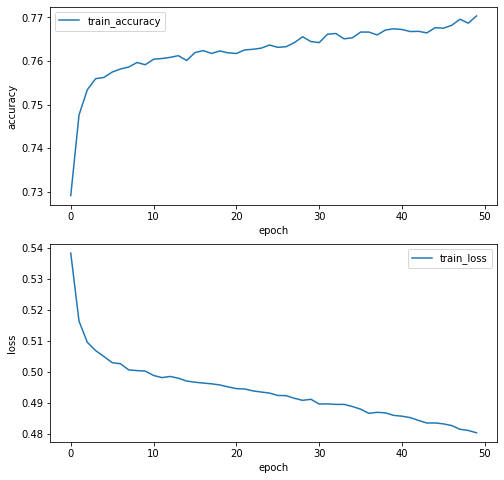

In [140]:
def plot_results(model):

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(history.history['accuracy'], label = 'train_accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.subplot(2, 1, 2)
    plt.plot(history.history['loss'], label = 'train_loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.show()
    
plot_results(model)

In [141]:
Y

array([0., 0., 0., ..., 0., 0., 0.])

In [144]:
y = (df.HeartDisease.iloc[5])
x = df.drop(columns = "HeartDisease").iloc[5]
x = np.array(x)
x

array([28.87,  1.  ,  0.  ,  0.  ,  6.  ,  0.  ,  1.  ,  0.  , 11.  ,
        2.  ,  0.  ,  0.  ,  1.  , 12.  ,  0.  ,  0.  ,  0.  ])